# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
Humidity = []
Cloudiness = []
Country = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
cityy = []


for city in cities:
    try:
        base_url = "http://api.openweathermap.org/data/2.5/weather?"
    
        complete_url = base_url + "appid=" + api_key + "&q=" + city
    
        response = requests.get(complete_url) 
    
        x = response.json() 
#     print(json.dumps(x, indent=4, sort_keys=True))

        Humidity.append(x['main']['humidity'])
        Cloudiness.append(x['clouds']['all'])
        Lat.append(x['coord']['lat'])
        Lng.append(x['coord']['lon'])
        Max_Temp.append(x['main']['temp_max'])
        Wind_Speed.append(x['wind']['speed'])
        Country.append(x['sys']['country'])
        cityy.append(city)
        print(f"Processing data for {city}")
    except: 
        print(f"Skipping {city}")


Processing data for haapiti
Processing data for kuybyshevo
Processing data for la paz
Processing data for naga
Processing data for vaini
Processing data for punta arenas
Processing data for kapaa
Processing data for ustka
Processing data for port-gentil
Skipping saleaula
Processing data for kahului
Processing data for zhezkazgan
Processing data for pyaozerskiy
Processing data for upernavik
Processing data for qaanaaq
Processing data for luderitz
Processing data for hithadhoo
Processing data for shenjiamen
Processing data for mataura
Skipping mys shmidta
Processing data for chitral
Processing data for lavrentiya
Processing data for namatanai
Processing data for kibala
Processing data for iqaluit
Processing data for ust-kulom
Processing data for longyearbyen
Processing data for yenagoa
Skipping marang
Skipping catamarca
Processing data for estevan
Processing data for ushuaia
Processing data for hilo
Skipping yanan
Processing data for sitka
Processing data for chuy
Skipping tukrah
Process

Skipping labrea
Processing data for antofagasta
Processing data for yakeshi
Processing data for lumeje
Processing data for nemuro
Skipping torit
Processing data for verkhnevilyuysk
Processing data for mudgee
Processing data for ancud
Processing data for curup
Processing data for airai
Processing data for sao filipe
Skipping eldikan
Processing data for ustek
Processing data for nago
Processing data for port elizabeth
Skipping meyungs
Skipping tabiauea
Processing data for souillac
Processing data for northam
Processing data for shostka
Processing data for saint anthony
Processing data for alugan
Processing data for keuruu
Processing data for fougeres
Processing data for umm kaddadah
Processing data for kualakapuas
Skipping rungata
Processing data for eyl
Processing data for albury
Processing data for los llanos de aridane
Processing data for yeppoon
Processing data for revadanda
Processing data for san roque
Processing data for kijang
Processing data for vao
Processing data for vila fran

Processing data for taltal
Processing data for bago
Processing data for monforte de lemos
Processing data for soria
Processing data for mariani
Processing data for dabou
Processing data for yarmouth
Skipping warqla
Processing data for sulangan
Processing data for saldanha
Skipping hihifo
Processing data for saint-augustin
Processing data for arlit
Processing data for olden
Processing data for riviera beach
Processing data for evensk
Processing data for kaduqli
Processing data for nehe
Skipping shchelyayur
Processing data for key largo
Processing data for kiruna
Processing data for pocatello
Skipping khormuj
Processing data for neverkino
Processing data for birnin kebbi
Processing data for kharabali
Processing data for terre haute
Processing data for phalodi
Processing data for panalingaan
Processing data for rogaska slatina
Processing data for alofi
Processing data for narsaq
Processing data for hualmay
Processing data for bubaque
Processing data for lasa
Processing data for nakusp
Ski

In [16]:
cities_df = pd.DataFrame({
    "City": (cityy)
})

cities_df["Cloudiness"] = Cloudiness
cities_df["Country"] = Country 
cities_df["Humidity"] = Humidity
cities_df["Lat"] = Lat
cities_df["Lng"] = Lng
cities_df["Max Temp"] = Max_Temp
cities_df["Wind Speed"] = Wind_Speed
cities_df.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,haapiti,40,PF,69,-17.57,-149.87,301.15,3.60
1,kuybyshevo,37,UA,81,44.63,33.86,297.33,3.19
2,la paz,40,MX,18,24.15,-110.32,309.15,5.10
3,naga,100,PH,82,13.62,123.19,301.70,7.93
4,vaini,75,IN,100,15.34,74.49,295.15,3.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

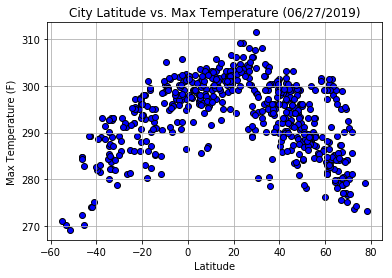

In [17]:
# making x axis for all plots
#making y axis
x_axis = cities_df["Lat"]
y_axis_T = cities_df["Max Temp"]
plt.scatter(x_axis, y_axis_T, marker="o", facecolors="blue", edgecolors="black")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (06/27/2019)")
plt.grid()
plt.savefig("Weather_images/latvs.maxtemp.png")

#### Latitude vs. Humidity Plot

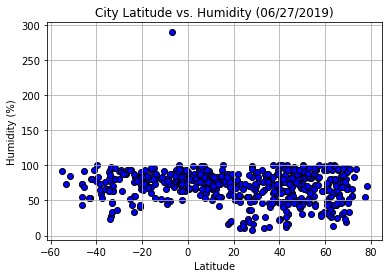

In [18]:
# making y axis
y_axis_H = cities_df["Humidity"]
plt.scatter(x_axis, y_axis_H, marker="o", facecolors="blue", edgecolors="black")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (06/27/2019)")
plt.grid()
plt.savefig("Weather_images/latvs.humidity.png")

#### Latitude vs. Cloudiness Plot

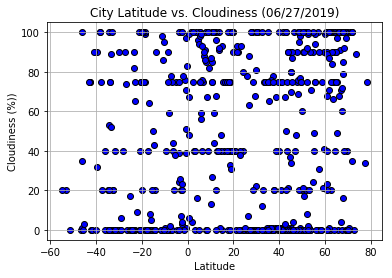

In [19]:
#making y axis 
y_axis_C = cities_df["Cloudiness"]
plt.scatter(x_axis, y_axis_C, marker="o", facecolors="blue", edgecolors="black")
plt.ylabel("Cloudiness (%))")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (06/27/2019)")
plt.grid()
plt.savefig("Weather_images/latvs.cloudiness.png")

#### Latitude vs. Wind Speed Plot

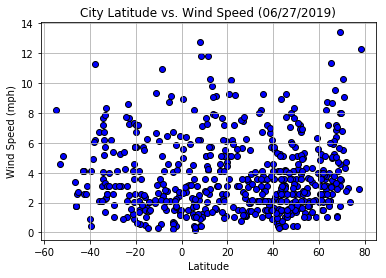

In [20]:
#making y axis
y_axisW = cities_df["Wind Speed"]
plt.scatter(x_axis, y_axisW, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (06/27/2019)")
plt.grid()
plt.savefig("Weather_images/latvs.windspeed.png")

In [11]:
cities_df.to_csv("City_Output.csv")